In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 


plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")


<Figure size 1000x800 with 0 Axes>

# Data analysis

In [3]:
initial_df = pd.read_csv("adverts.csv")

Checking for duplicates

In [4]:
initial_df.duplicated(subset=['public_reference'], keep=False).sum()
# THERE'S CLEARLY NO DUPLICATES HERE SO I WILL CONTINUE TO DROP PUBLIC REFERENCE AND REG CODE.
# AS PUBLIC REFERENCE AND REG CODE HAVE NO PREDICTIVE CAPABILITY. CAN ONLY BIAS VALUES


0

Dropping unrelated columns

In [5]:
temp_df = initial_df.copy()#.drop('public_reference', axis=1)
df = temp_df.drop("reg_code", axis=1)

In [6]:
df.head()

,public_reference,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [7]:
df.tail()

,public_reference,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,202010315652942,5179.0,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [8]:
df.sample()

,public_reference,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
360096,202008011952070,5987.0,Black,Nissan,Juke,USED,2019.0,12895,SUV,False,Petrol


Data Distribution and Type Analysis

In [9]:
print(df.isnull().sum())
print('\n',df.describe())

public_reference             0
mileage                    127
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

        public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000      

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   standard_colour        396627 non-null  object 
 3   standard_make          402005 non-null  object 
 4   standard_model         402005 non-null  object 
 5   vehicle_condition      402005 non-null  object 
 6   year_of_registration   368694 non-null  float64
 7   price                  402005 non-null  int64  
 8   body_type              401168 non-null  object 
 9   crossover_car_and_van  402005 non-null  bool   
 10  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 31.1+ MB


In [11]:
df.dtypes

public_reference           int64
mileage                  float64
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [12]:
df.shape

(402005, 11)

Distribution skewness and kurtosis for price and mileage

In [13]:
from scipy.stats import skew, kurtosis

skewness = skew(df['price'])
kurt = kurtosis(df['price'])

# high rightward skew
# very heavy tails and a very sharp peak
skewness,kurt

(154.68094995570175, 32182.272958624522)

In [14]:

skewness = skew(df['mileage'])
kurt = kurtosis(df['mileage'])

skewness,kurt
# CURRENTLY, PRESENCE OF NULL VALUES PRESENT NAN IN OUTPUT. LATER RECTIFIED ONCE NULL IMPUTED

(nan, nan)

Range for year

In [15]:
print(df['year_of_registration'].max(),df['year_of_registration'].min())

2020.0 999.0


Visualizing year distribution

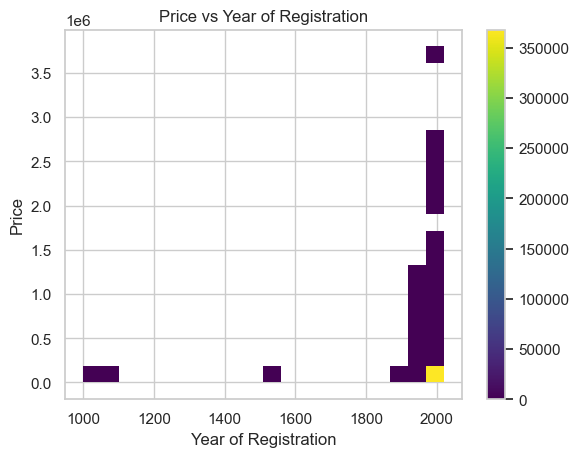

In [16]:

sns.histplot(data=df, x='year_of_registration', y='price', bins=20, cmap='viridis', cbar=True)

plt.xlabel('Year of Registration')
plt.ylabel('Price')
plt.title('Price vs Year of Registration')

plt.show()

# AS SEEN BELOW CLEARLY SOME CARS ARE REGISTERED AS OLDER THAN 1000 YEARS 

In [17]:
df['mileage'].quantile(0.95)

105150.0

Subsetting the dataset for data processing

In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns, categorical_columns

(Index(['public_reference', 'mileage', 'year_of_registration', 'price'], dtype='object'),
 Index(['standard_colour', 'standard_make', 'standard_model',
        'vehicle_condition', 'body_type', 'fuel_type'],
       dtype='object'))

In [19]:
from scipy.stats import entropy

for column in numeric_columns:
    column_entropy = entropy(df[column].value_counts(normalize=True))
    print(column, column_entropy)

public_reference 12.904219805334755
mileage 9.277392563974587
year_of_registration 2.601977635075203
price 7.982809225693327


Analysing unique value counts, mode, and mode frequency for categorical columns

In [20]:
results = pd.DataFrame(columns=['Column', 'Distinct Count'
                                , 'Mode', 'Mode Frequency'])

for column in categorical_columns:
    distinct_count = df[column].nunique()
    mode_value = df[column].mode().iloc[0]
    mode_frequency = df[column].value_counts().iloc[0]

    results = results.append({
        'Column': column,
        'Distinct Count': distinct_count,
        'Mode': mode_value,
        'Mode Frequency': mode_frequency/len(df),
    }, ignore_index=True)

results

,Column,Distinct Count,Mode,Mode Frequency
0,standard_colour,22,Black,0.214642
1,standard_make,110,BMW,0.092974
2,standard_model,1168,Golf,0.028813
3,vehicle_condition,2,USED,0.922267
4,body_type,16,Hatchback,0.416201
5,fuel_type,9,Petrol,0.539618


Analysing predictive performance - Intercorrelation of variables using pearson's correlation coefficient

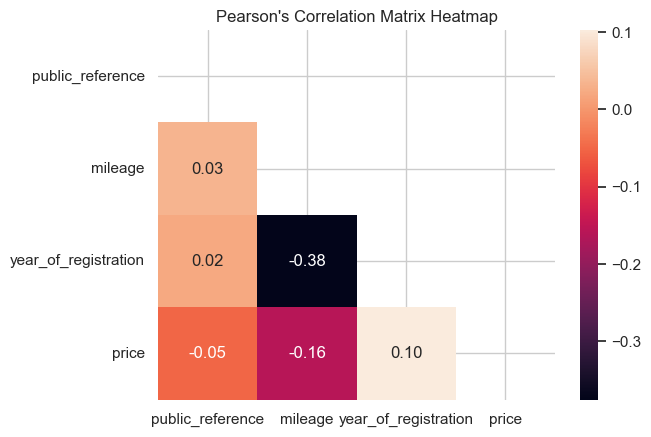

In [21]:
correlation_matrix = df[numeric_columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f', mask=mask)
plt.title("Pearson's Correlation Matrix Heatmap")
plt.show()

Using point biserial correlation to understand binary categorical associations with target values

In [22]:
from scipy.stats import pointbiserialr
pointbiserialr(df['crossover_car_and_van'], df['price'])

SignificanceResult(statistic=0.010401617718628022, pvalue=4.247245761774566e-11)

Using spearman correlation which includes binary values

In [23]:
df.corr(method='spearman')

,public_reference,mileage,year_of_registration,price,crossover_car_and_van
public_reference,1.000000,0.158874,-0.113875,-0.113341,-0.003615
mileage,0.158874,1.000000,-0.824952,-0.645445,0.018894
year_of_registration,-0.113875,-0.824952,1.000000,0.677529,-0.008311
price,-0.113341,-0.645445,0.677529,1.000000,0.040673
crossover_car_and_van,-0.003615,0.018894,-0.008311,0.040673,1.000000


In [24]:
numeric_columns

Index(['public_reference', 'mileage', 'year_of_registration', 'price'], dtype='object')

# Visualizing distributions

<Axes: xlabel='price'>

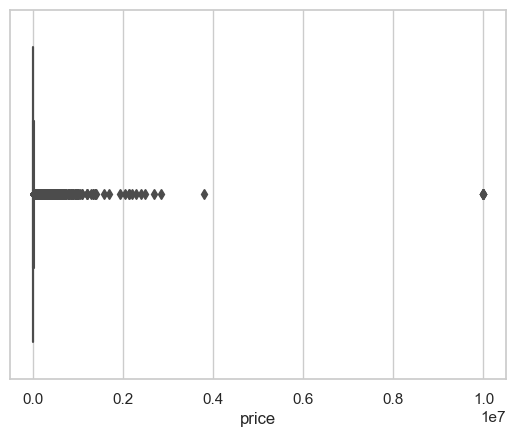

In [25]:
sns.boxplot(x=df['price'])

# THIS ISN'T INFORMATIVE AT ALL AS THE OUTLIER RANGE IS SO GREAT THE REST SITS IN A TIGHT RANGE RELATIVELY, PREVENTING VISUALIZATION. 
# CAN THUS USE LOG FOR EXPONENTIALLY LARGE VALUES

Log price and mileage KDE plot

In [26]:
mileage_iqr = df['mileage'].quantile(0.75) - df['mileage'].quantile(0.25)
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

mileage_threshold = df['mileage'].quantile(0.75) + 1.5 * mileage_iqr
price_threshold = df['price'].quantile(0.75) + 1.5 * price_iqr

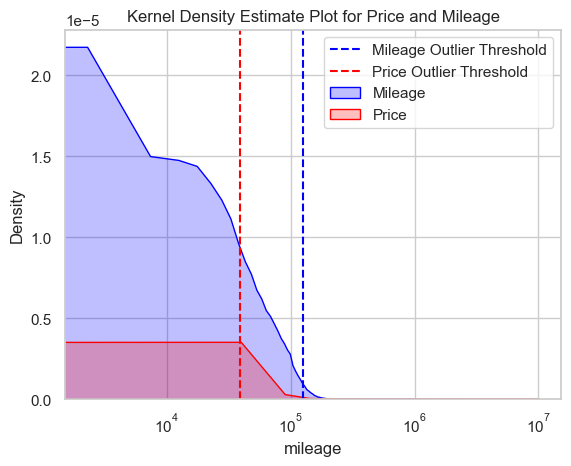

In [27]:
plt.axvline(x=mileage_threshold, color='blue', linestyle='--', 
            label='Mileage Outlier Threshold')
plt.axvline(x=price_threshold, color='red', linestyle='--', 
            label='Price Outlier Threshold')
sns.kdeplot(data=df, x='mileage', fill=True, color='blue', label='Mileage')
sns.kdeplot(data=df, x='price', fill=True, color='red', label='Price')
plt.xscale('log')
plt.title('Kernel Density Estimate Plot for Price and Mileage')
plt.legend()
plt.show()

Percentage of outliers

In [28]:

price_outliers_count = df[df['price'] > price_threshold].shape[0]

percentage_price_outliers = (price_outliers_count / df.shape[0]) * 100

print(percentage_price_outliers)
# BELOW SHOWS 6.5% OF PRICE IS PURELY UPPER OUTLIERS

6.534495839603985


In [29]:
df['price']

0         73970
1          7000
2         14000
3          7995
4         26995
          ...  
402000    10595
402001     2000
402002     7250
402003    11490
402004    20520
Name: price, Length: 402005, dtype: int64

Log price distribution plot

Text(0.5, 1.0, 'Distribution of price')

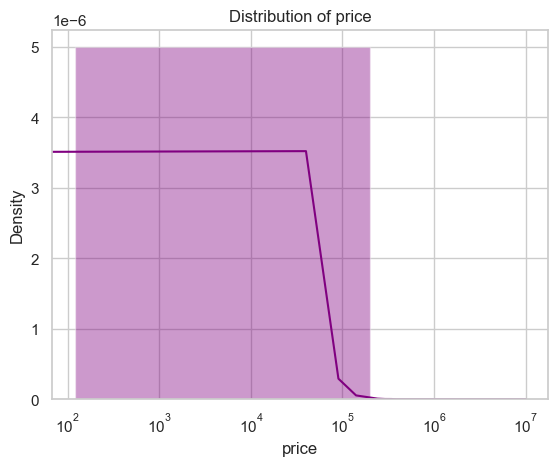

In [30]:
fig, ax = plt.subplots()
dist = sns.distplot(df["price"], color="purple",ax = ax)
plt.xscale('log')

plt.title("Distribution of price")


Analysing ranges for every numeric column

In [31]:
for column in numeric_columns:
    print(column)
    min = df[column].min()
    max = df[column].max()
    print('min: ',min)
    print('min: ',max)
    print(f'The total initial range in values is: ',max-min)
# VERY LARGE RANGE INDICATING OUTLIERS IN PRICE

public_reference
min:  201307177852187
min:  202011025683478
The total initial range in values is:  703847831291
mileage
min:  0.0
min:  999999.0
The total initial range in values is:  999999.0
year_of_registration
min:  999.0
min:  2020.0
The total initial range in values is:  1021.0
price
min:  120
min:  9999999
The total initial range in values is:  9999879


Visualizing null distribution across all columns

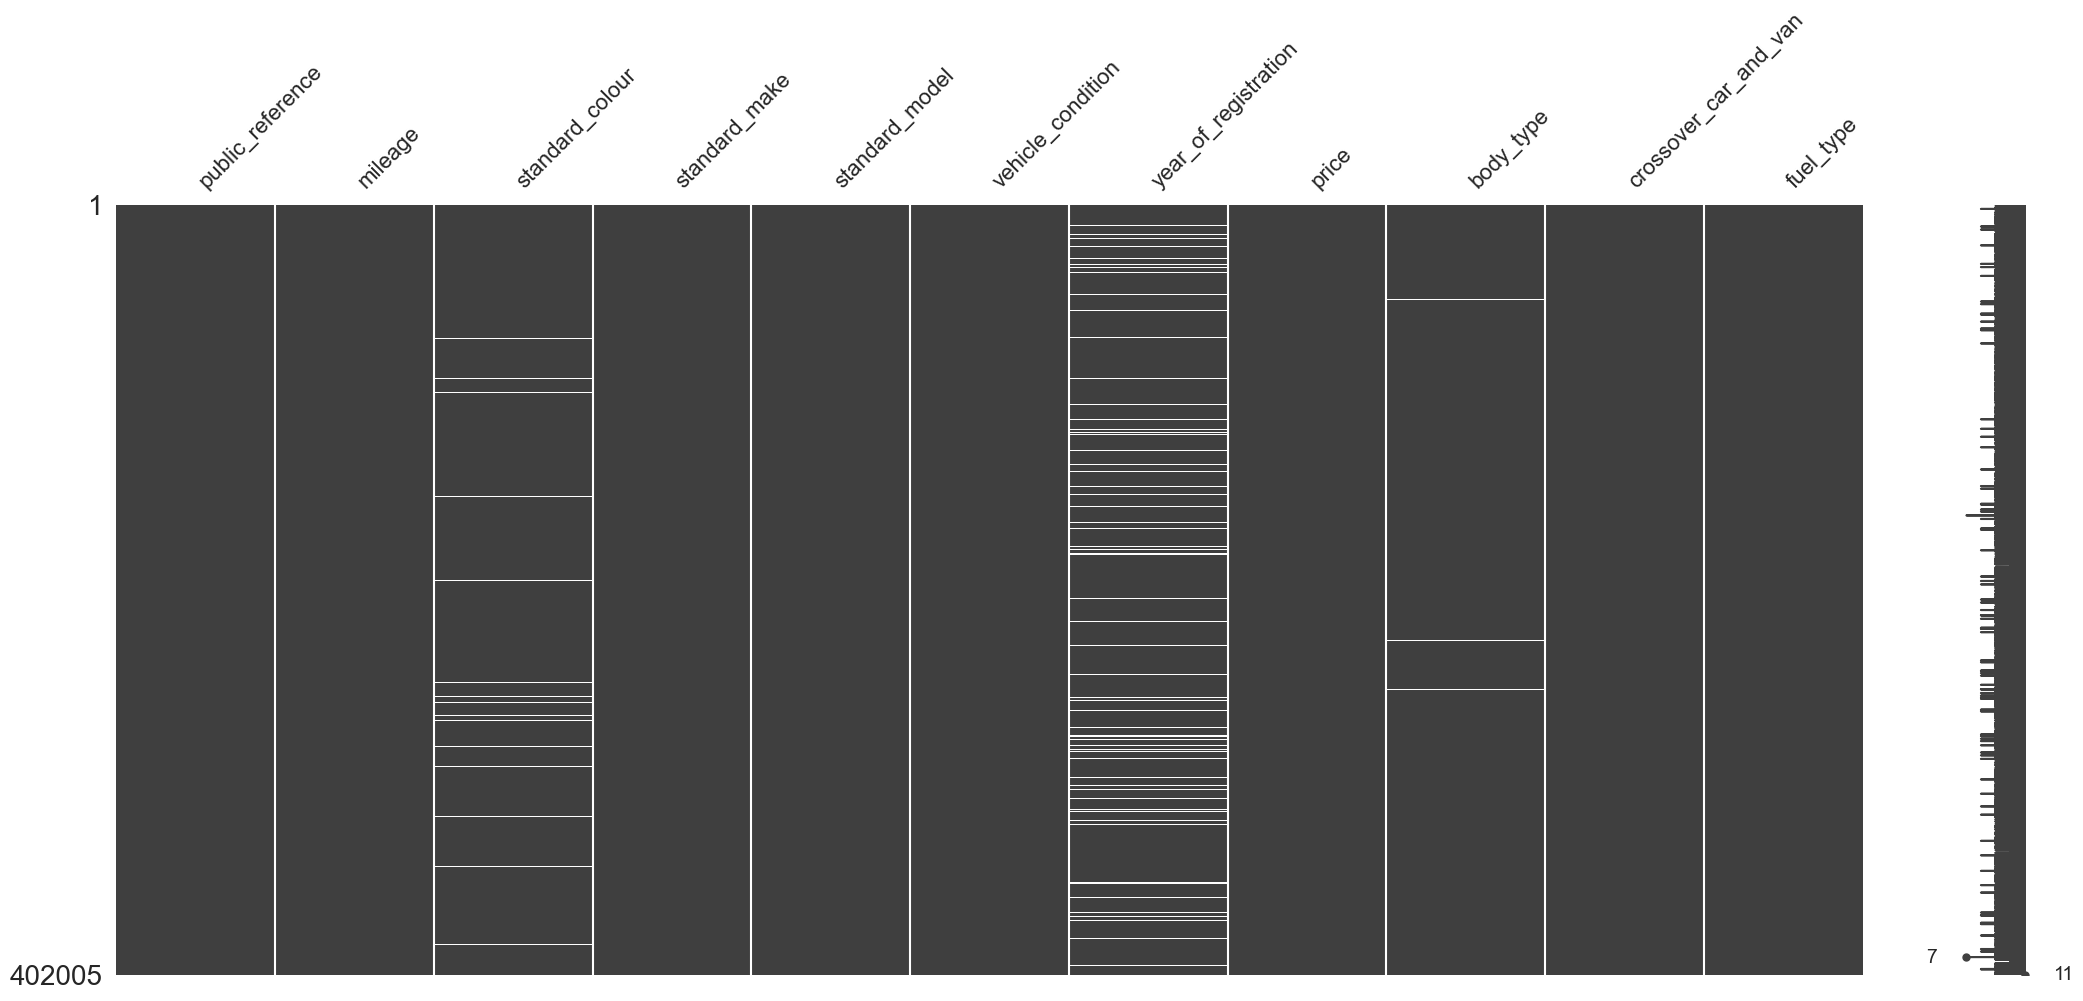

Total missing values:  
 public_reference             0
mileage                    127
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64


In [32]:
msno.matrix(df)
plt.show()
# SHOWS HOW OFTEN THERE'S NULL VALUES WITHIN OUR DATASET!
print("Total missing values: ",'\n', df.isnull().sum())

Calculating percentages of outliers | Any columns exceeding a 40% threshold ought to be removed

In [33]:

missing_columns=[]
for column in df.columns:
    if df[column].isnull().sum() > 0:
        missing_columns.append(column)


for column in missing_columns:
    print(column, (df[column].isnull().sum()/df.shape[0])*100)
# NONE BELOW EXCEED 40%, THEREFORE WE HAVE NO REASON TO REMOVE ANY FEATURE ENTIRELY SOLELY DUE TO NULL VALUE COUNTS

mileage 0.03159164687006381
standard_colour 1.3377943060409696
year_of_registration 8.28621534558028
body_type 0.20820636559246777
fuel_type 0.14950062810164053


Analysing level of correlation in nullity between features

<Axes: >

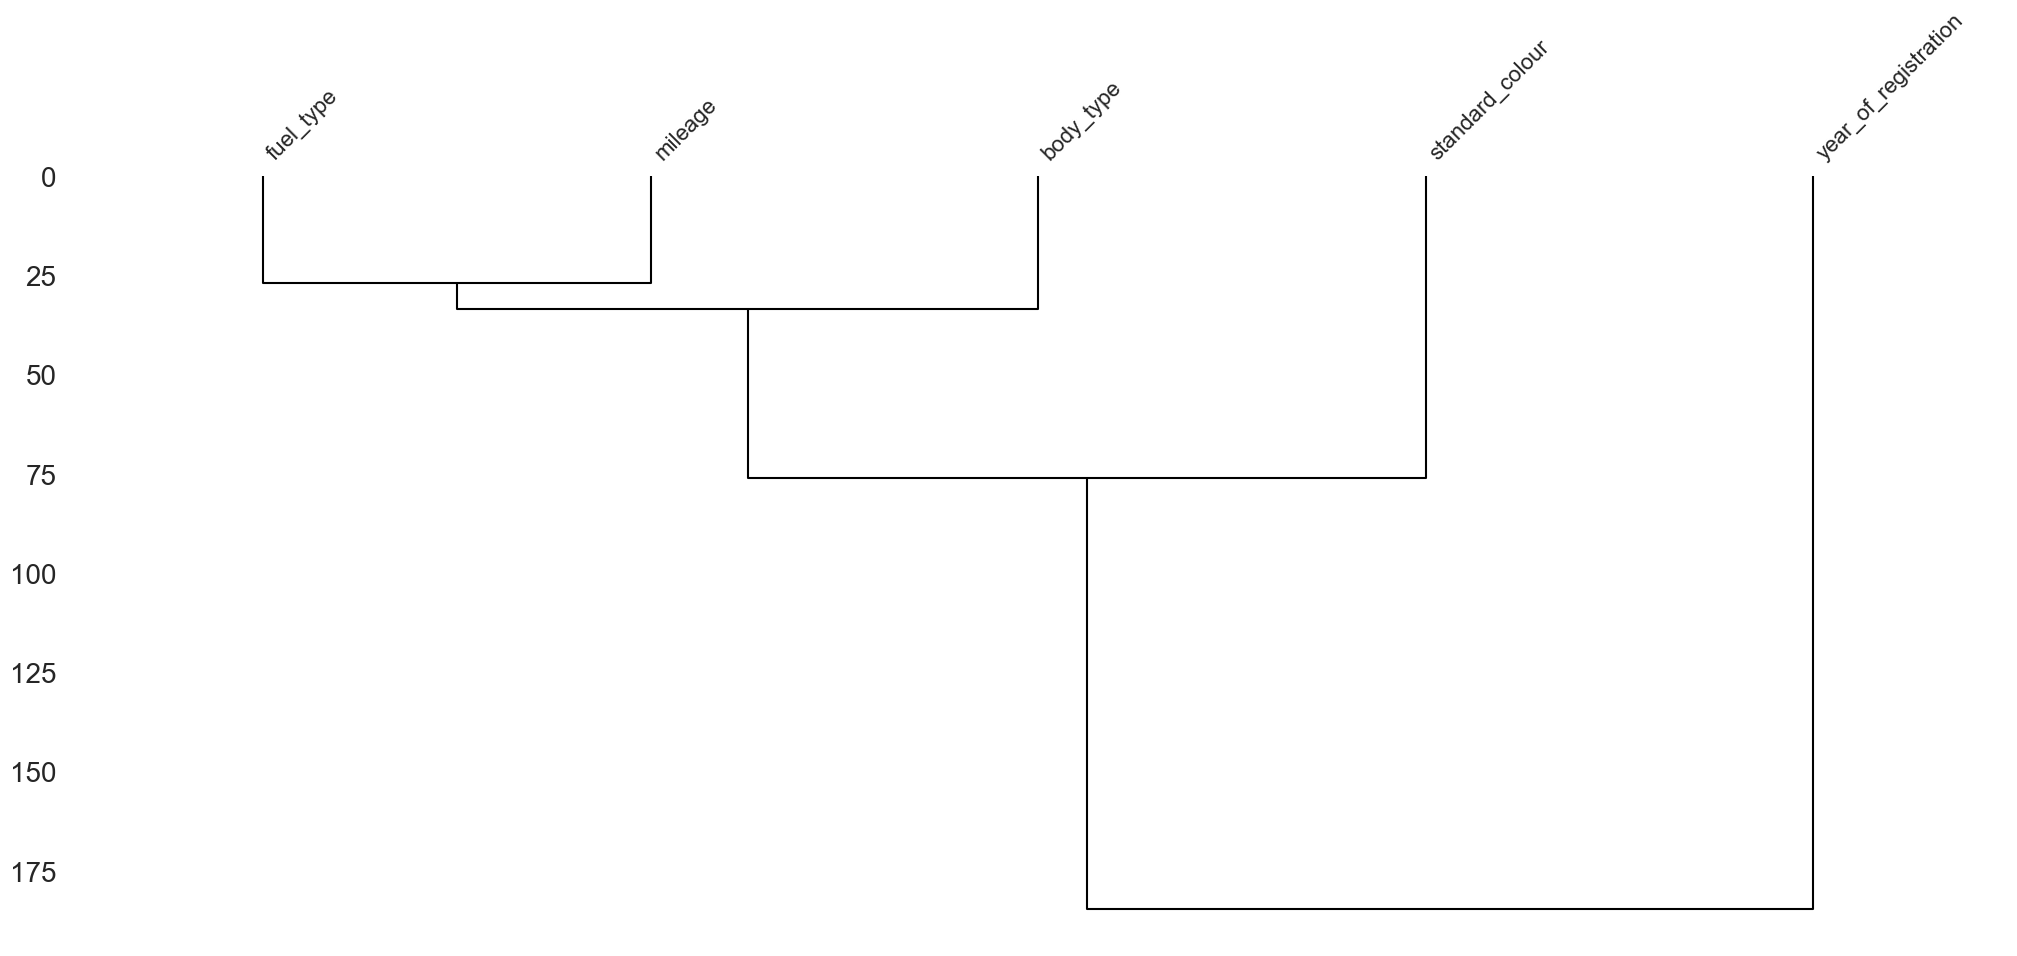

In [34]:
msno.dendrogram(df[missing_columns])
# The height indicates the level of correlation between the two attributes in terms of missing data

# Data Preprocessing

Outlier removal

In [35]:
processed_df = df.copy()

for column in ['mileage','price','year_of_registration']:
    q1 = processed_df[column].quantile(0.25)
    q3 = processed_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_outlier = q1 - 1.5 * iqr
    upper_outlier = q3 + 1.5 * iqr
    processed_df[column] = processed_df[(processed_df[column] >= lower_outlier) & (processed_df[column] <= upper_outlier)][column]
    print('____UPPER____','\n', df[df[column]>upper_outlier], '\n','____LOWER____','\n', df[df[column]<lower_outlier])

# BELOW SHOWS THE OUTLIER VALUES BEYOND THE Q3 QUANTILE
# THERE ARE NO LOWER OUTLIER VALUES AT ALL, BELOW THE Q1 QUANTILE 

____UPPER____ 
         public_reference   mileage standard_colour standard_make  \
32       201905097776109  180000.0           White         SKODA   
86       202008262951083  158900.0            Grey         Honda   
165      202009244172272  143000.0             Red    Land Rover   
187      202009304395201  151580.0           Black          Audi   
214      202010064650799  135000.0           Black    Volkswagen   
...                  ...       ...             ...           ...   
401744   202008142487322  130000.0           White         SKODA   
401866   202010054615465  139567.0           Beige         SKODA   
401934   202010205229756  128787.0          Silver       Peugeot   
401951   202010235326414  285038.0            Blue        Toyota   
401958   202010245397920  131980.0           Black           BMW   

             standard_model vehicle_condition  year_of_registration  price  \
32                  Octavia              USED                2014.0   3989   
86         

New year range

In [36]:
processed_df['year_of_registration'].max()-processed_df['year_of_registration'].min()

# REMOVING OUTLIERS REDUCES THE YEAR RANGE TO THE 14 YEARS PRIOR TO 2020 INCLUSIVE

14.0

# Visualizing after outlier removal

Visualizing years of registration with price | Histogram

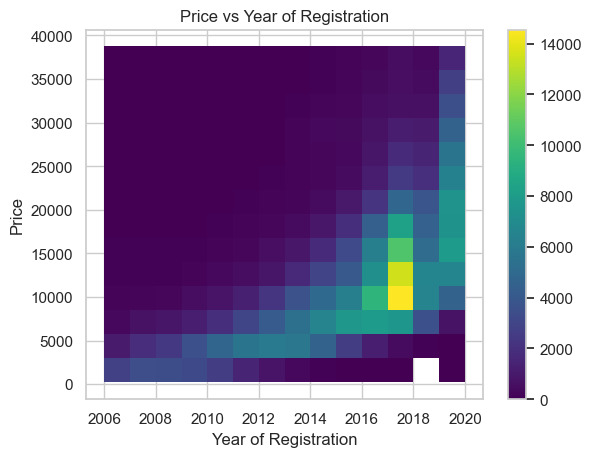

In [37]:
sns.histplot(data=processed_df, x='year_of_registration', y='price', 
             bins=14, cmap='viridis', cbar=True)

# MADE INTO 14 BINS BECAUSE THAT'S THE RANGE
plt.xlabel('Year of Registration')
plt.ylabel('Price')
plt.title('Price vs Year of Registration')
plt.show()

Re-visualizing kde distribution for mileage and price post-outlier-removal

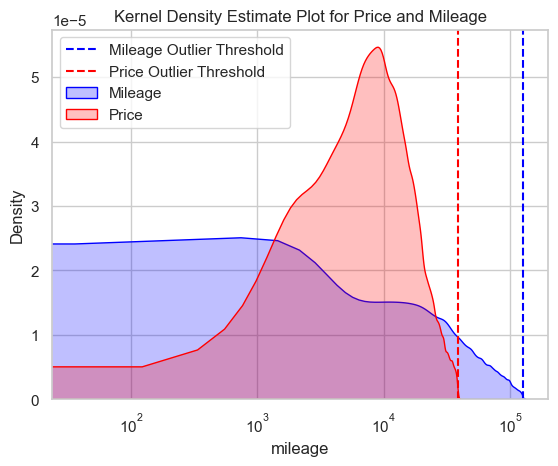

In [38]:

mileage_iqr = df['mileage'].quantile(0.75) - df['mileage'].quantile(0.25)
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

mileage_threshold = df['mileage'].quantile(0.75) + 1.5 * mileage_iqr
price_threshold = df['price'].quantile(0.75) + 1.5 * price_iqr

plt.axvline(x=mileage_threshold, color='blue', linestyle='--', label='Mileage Outlier Threshold')

plt.axvline(x=price_threshold, color='red', linestyle='--', label='Price Outlier Threshold')

sns.kdeplot(data=processed_df, x='mileage', fill=True, color='blue', label='Mileage')
sns.kdeplot(data=processed_df, x='price', fill=True, color='red', label='Price')
plt.xscale('log')
# WAS INITIALLY NOT SCALED. ADDED LOG TO PREVENT THE NORMALIZATION THAT MESSED UP PLOT BC OF VERY LARGE VALUE RANGES

plt.title('Kernel Density Estimate Plot for Price and Mileage')
plt.legend()


plt.show()
# AS CAN BE SEEN BELOW, THEY BOTH NOW SIT UNDER THE THRESHOLD ENTIRELY 
# THE DISTRIBUTION SHOWS THAT AMOUNT OF PRICE VALUES IS MUCH MORE CONCENTRATED IN THE 10^3.5-10^4.5 MILEAGE VALUE RANGE
# ADDITIONALLY, THERE IS A STEEP DROP OFF IN PRICE ONCE THE CAR'S MILEACE EXCEEDS AROUND 10^4.5 VALUES
# THIS DISTRIBUTION IMPLIES CARS WITH MORE MILEAGE, UNTIL THE 10^4.5 THRESHOLD, TEND TO INCREASE IN PRICE DRASTICALLY

Visualizing data distributions for categorical columns

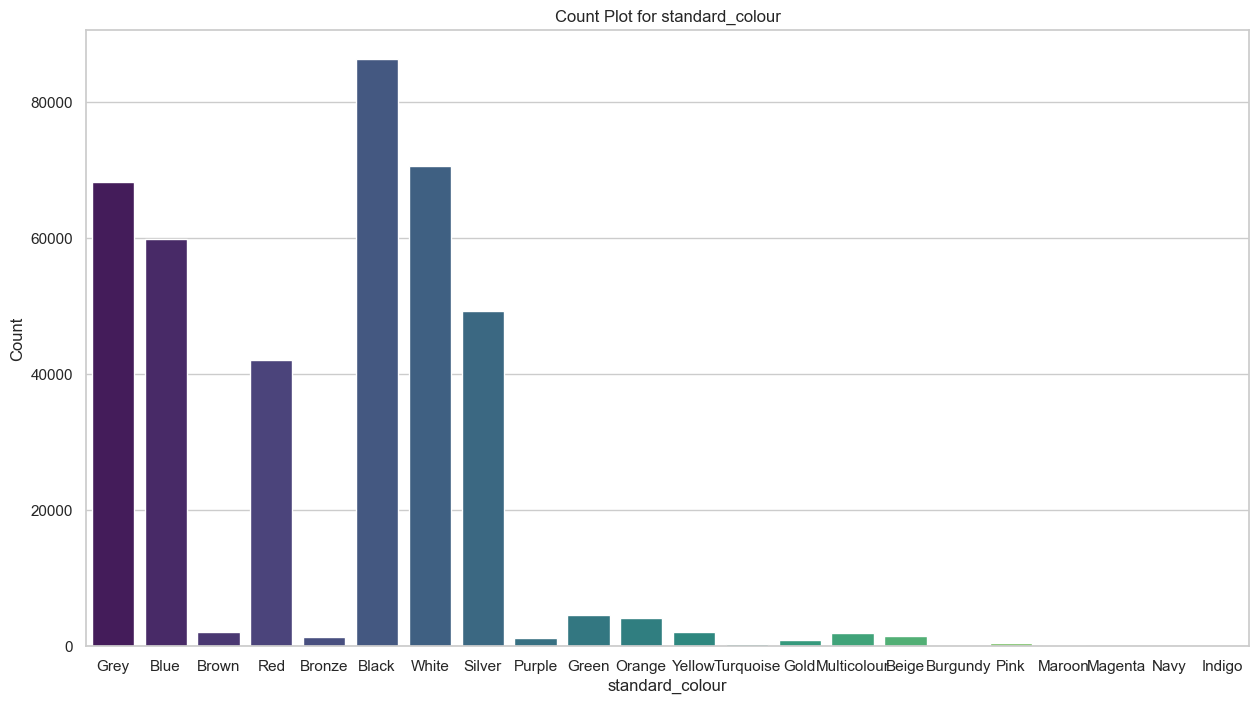

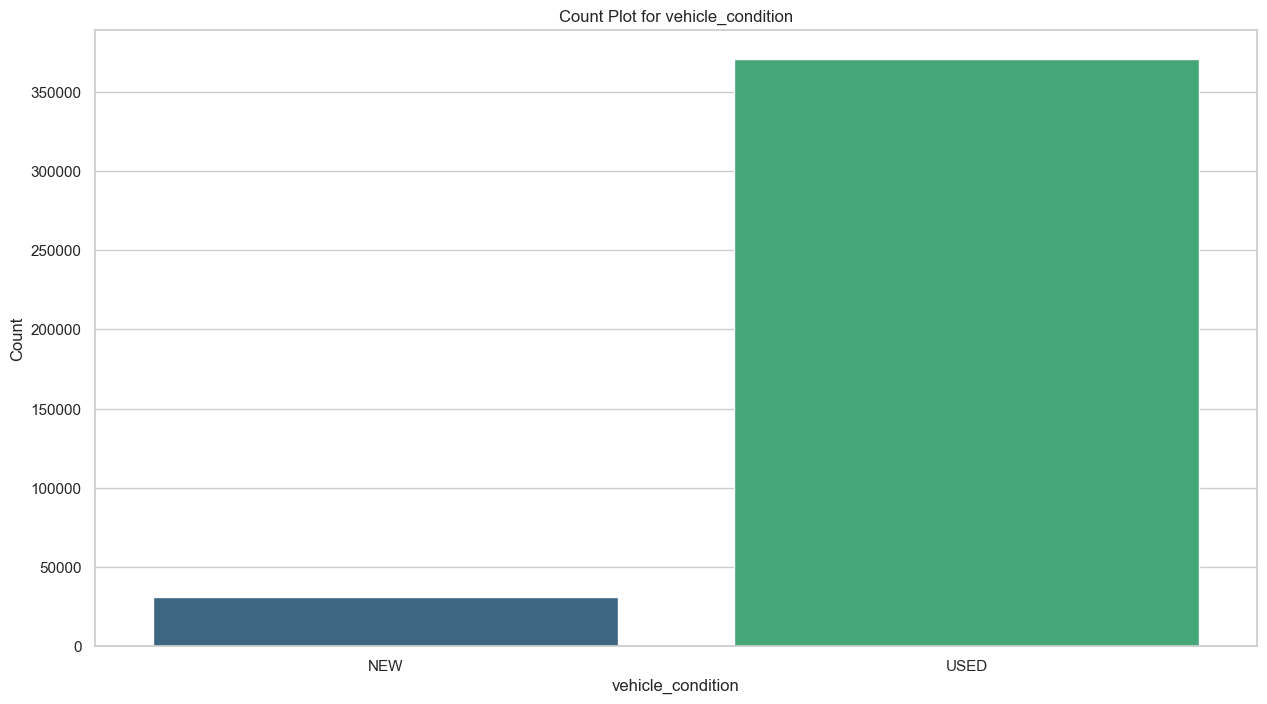

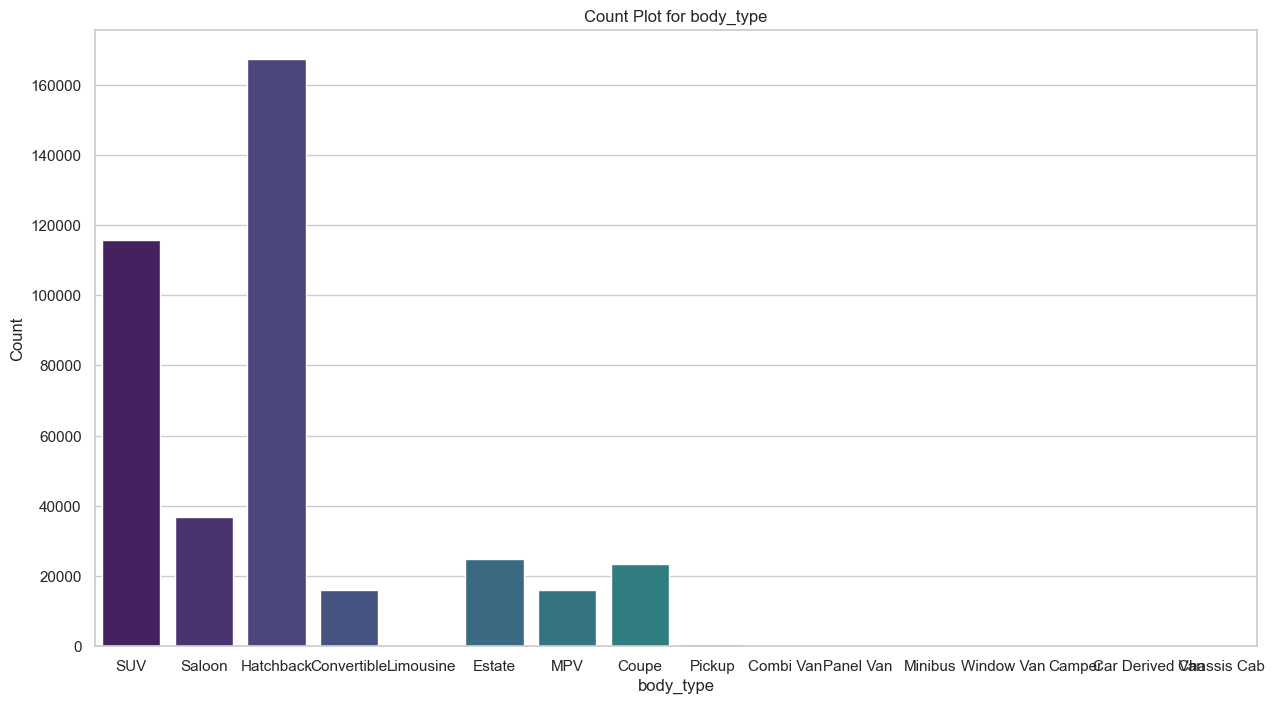

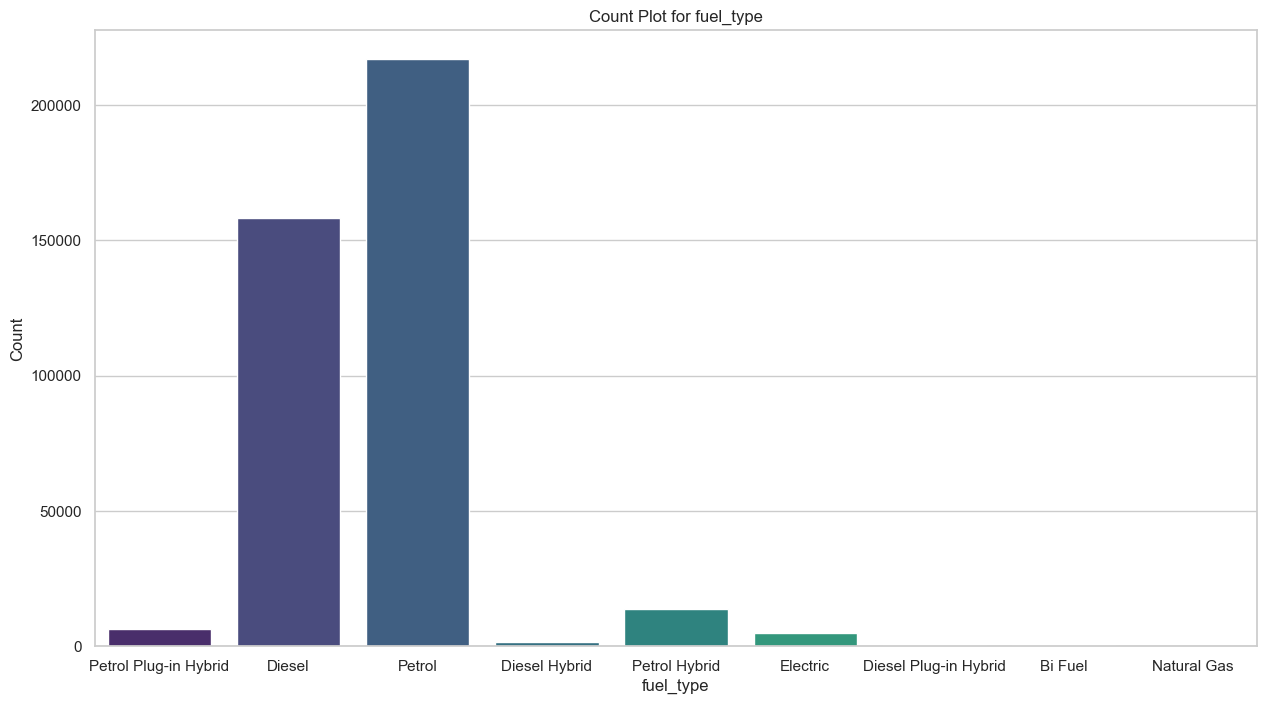

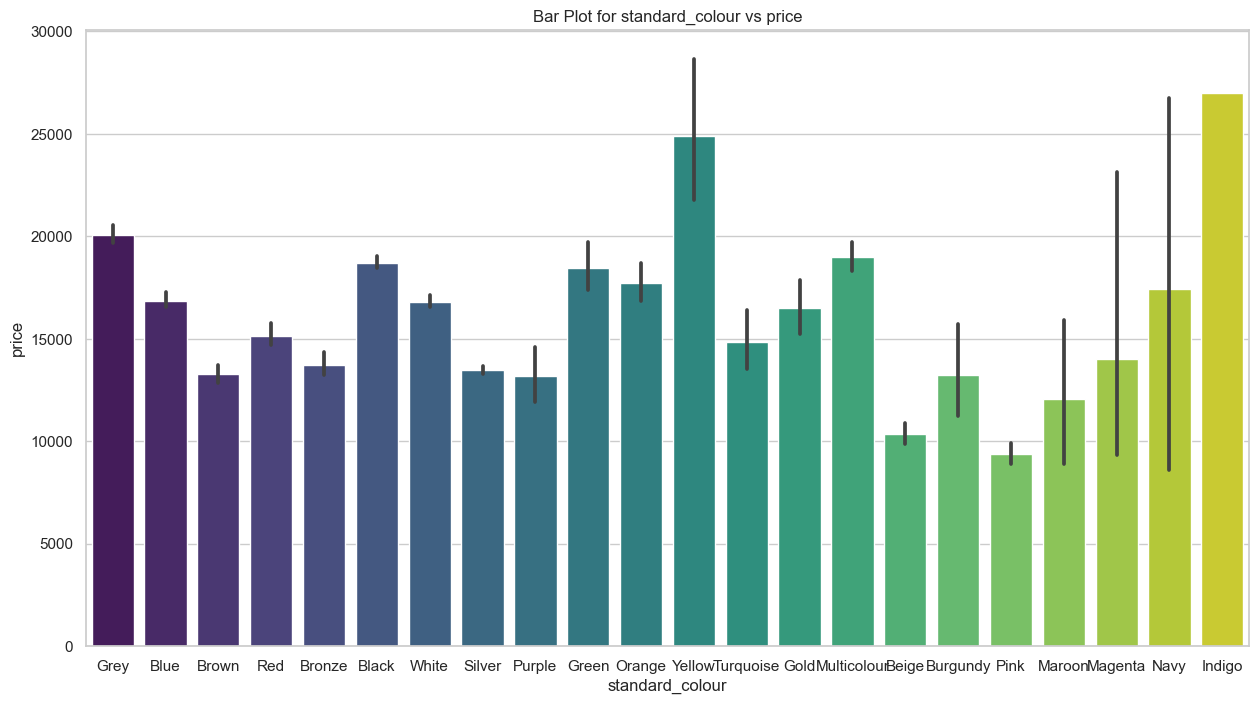

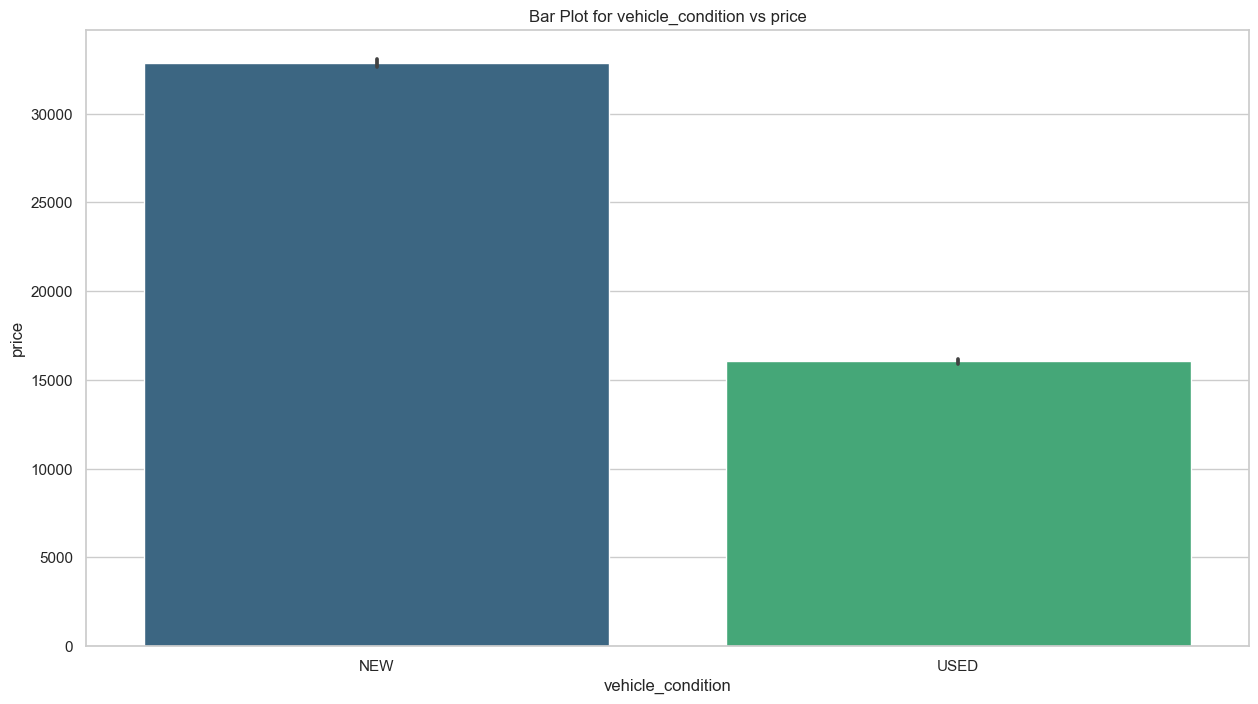

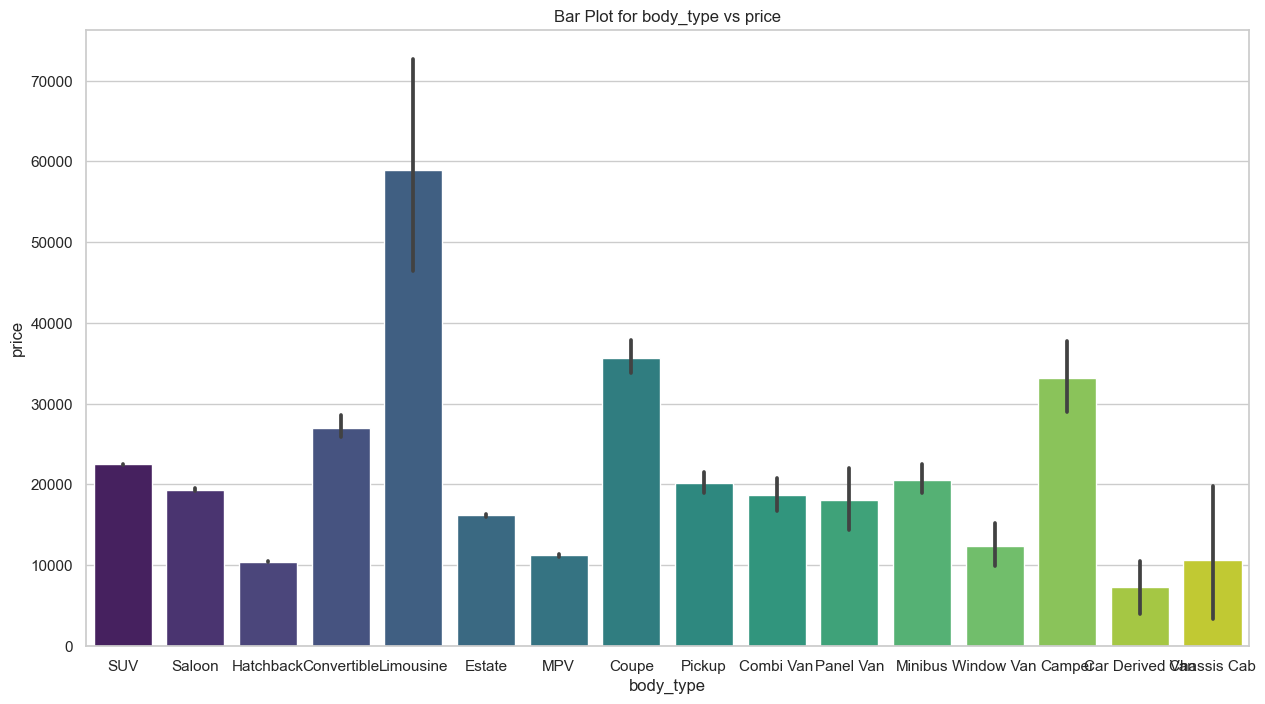

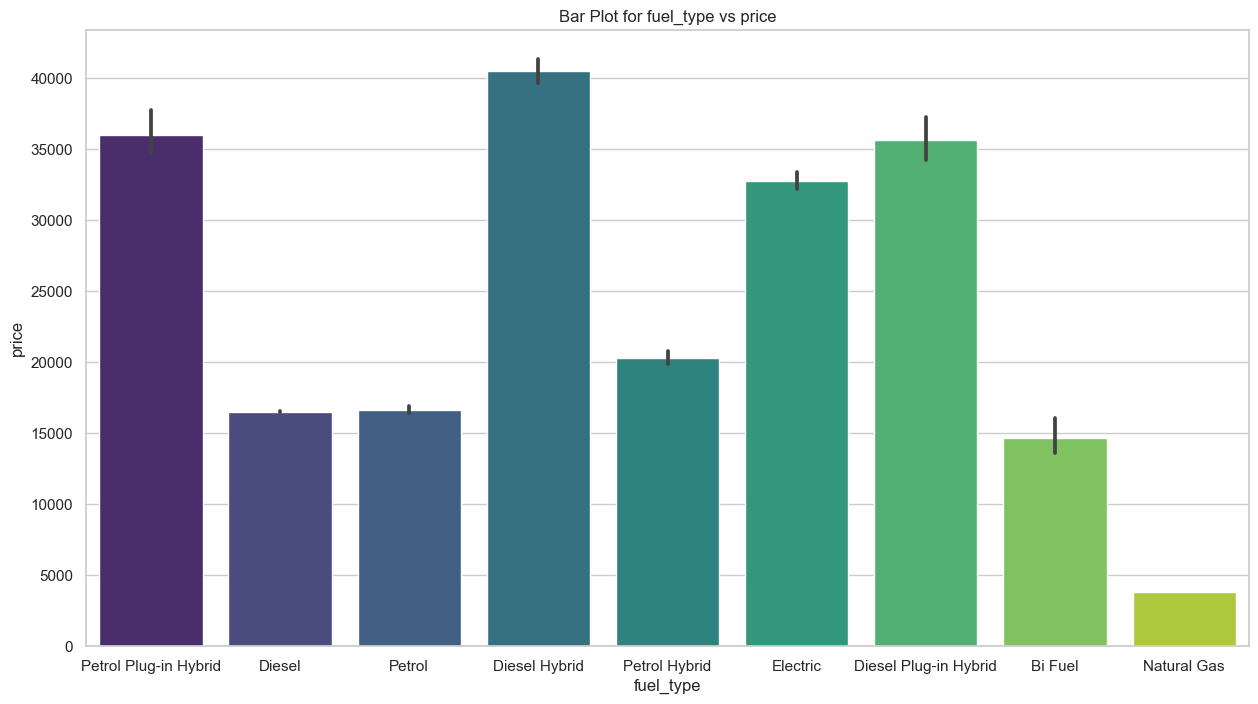

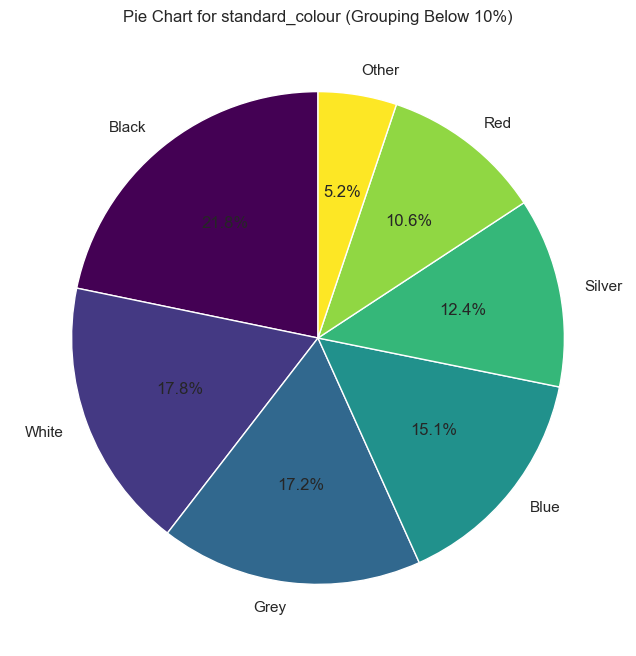

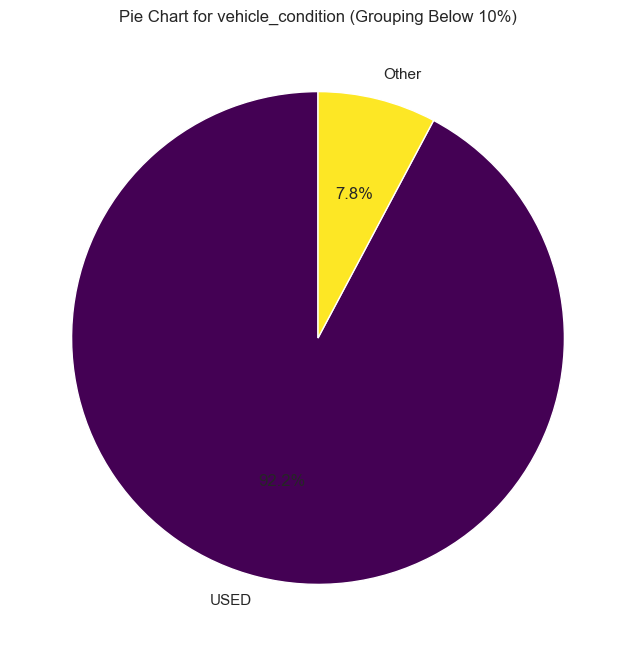

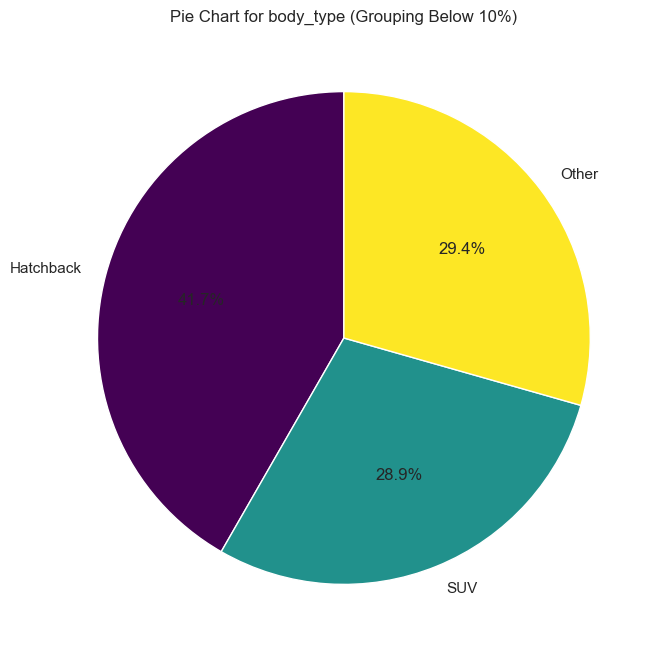

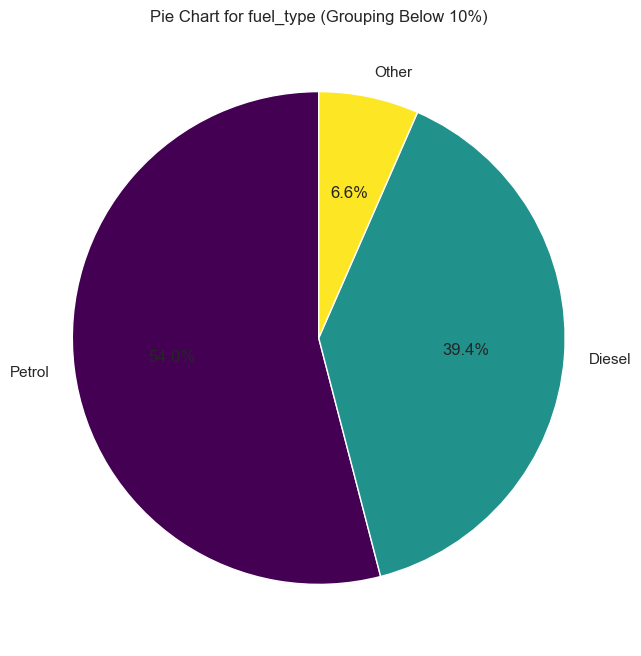

In [39]:
def count_plot_categorical(df, categorical_columns):
    for column in categorical_columns:
        plt.figure(figsize=(15, 8))
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title(f'Count Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

def bar_plot_categorical(df, categorical_columns, target_column):
    for column in categorical_columns:
        plt.figure(figsize=(15, 8))
        sns.barplot(x=column, y=target_column, data=df, palette='viridis')
        plt.title(f'Bar Plot for {column} vs {target_column}')
        plt.xlabel(column)
        plt.ylabel(target_column)
        plt.show()

def pie_chart_categorical(df, categorical_columns, threshold):
    for column in categorical_columns:
        value_counts_percent = df[column].value_counts(normalize=True) * 100
        
        main_categories = value_counts_percent[value_counts_percent >= threshold]
        other_categories = value_counts_percent[value_counts_percent < threshold]
        
        other_slice = pd.Series({'Other': other_categories.sum()})
        
        grouped_value_counts = main_categories.append(other_slice)
        
        plt.figure(figsize=(8, 8))
        grouped_value_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
        plt.title(f'Pie Chart for {column} (Grouping Below {threshold}%)')
        plt.ylabel('')
        plt.show()

target_column = 'price' 

cols = ['standard_colour',
       'vehicle_condition', 'body_type', 'fuel_type']

count_plot_categorical(df, ['standard_colour',
       'vehicle_condition', 'body_type', 'fuel_type'])
bar_plot_categorical(df, cols, target_column)
pie_chart_categorical(df, cols, 10)


Affirming correct parsing in all categorical columns

In [40]:
for column in categorical_columns:
    print("___________________________")
    print(f"{column} : \n {df[column].unique()}")
    print("___________________________")

# AS EXPECTED, ONLY ERRONOUS VALUES IN CATEGORICAL COLUMNS ARE THE PRESENCE OF NULL VALUES

___________________________
standard_colour : 
 ['Grey' 'Blue' 'Brown' 'Red' 'Bronze' 'Black' 'White' 'Silver' nan
 'Purple' 'Green' 'Orange' 'Yellow' 'Turquoise' 'Gold' 'Multicolour'
 'Beige' 'Burgundy' 'Pink' 'Maroon' 'Magenta' 'Navy' 'Indigo']
___________________________
___________________________
standard_make : 
 ['Volvo' 'Jaguar' 'SKODA' 'Vauxhall' 'Land Rover' 'Audi' 'Mercedes-Benz'
 'Volkswagen' 'Peugeot' 'SEAT' 'MINI' 'BMW' 'Nissan' 'Mitsubishi'
 'Ferrari' 'Citroen' 'Toyota' 'Kia' 'Renault' 'Fiat' 'Honda' 'Bentley'
 'DS AUTOMOBILES' 'Hyundai' 'Aston Martin' 'McLaren' 'Smart' 'Alfa Romeo'
 'Porsche' 'Abarth' 'Mazda' 'Suzuki' 'MG' 'Dacia' 'Subaru' 'SsangYong'
 'Maserati' 'Saab' 'Rolls-Royce' 'Lexus' 'Jeep' 'Panther' 'Chevrolet'
 'Lamborghini' 'Daihatsu' 'Dodge' 'Isuzu' 'Lotus' 'Tesla' 'TVR' 'GMC'
 'Rover' 'Cadillac' 'Infiniti' 'Alpine' 'Chrysler' 'Triumph' 'Morgan'
 'Dax' 'London Taxis International' 'Daimler' 'CUPRA' 'Perodua' 'Lincoln'
 'Bugatti' 'Great Wall' 'Replica' 'Opel'

Data distribution analysis after outlier removal

In [41]:
processed_df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,393697.000000,356779.000000,375736.000000
mean,2.020071e+14,35408.599385,2015.511891,13463.729911
std,1.691662e+10,30798.088893,3.397622,8332.934340
min,2.013072e+14,0.000000,2006.000000,120.000000
25%,2.020090e+14,10100.000000,2014.000000,7000.000000
50%,2.020093e+14,27833.000000,2016.000000,11990.000000
75%,2.020102e+14,54296.000000,2018.000000,18206.250000
max,2.020110e+14,126451.000000,2020.000000,38755.000000


Checking average price values for each unique value in categorical columns 

In [42]:
for column in categorical_columns:
    print(df.groupby(column)['price'].mean())
    

standard_colour
Beige          10352.538012
Black          18677.015124
Blue           16859.234176
Bronze         13734.460902
Brown          13278.984608
Burgundy       13220.047619
Gold           16512.962103
Green          18449.089766
Grey           20036.613452
Indigo         27000.000000
Magenta        14010.933333
Maroon         12036.283019
Multicolour    18979.063107
Navy           17434.857143
Orange         17701.321184
Pink            9368.060976
Purple         13165.540875
Red            15143.775890
Silver         13470.014861
Turquoise      14857.798046
White          16798.955114
Yellow         24867.117310
Name: price, dtype: float64
standard_make
AC            106466.666667
AK             44995.000000
Abarth         15463.889270
Aixam           4147.500000
Alfa Romeo     20468.593074
                  ...      
Volkswagen     14011.568475
Volvo          24999.204914
Westfield      12189.166667
Wolseley        9000.000000
Zenos          27997.000000
Name: price, Lengt

Joint plot distribution visualization

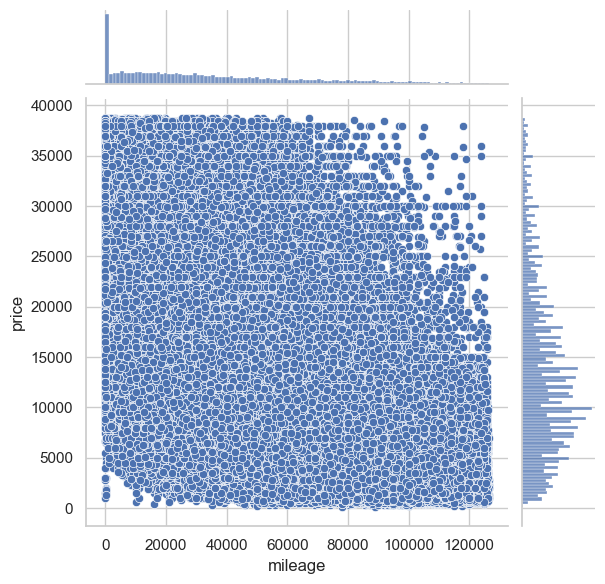

In [43]:
sns.jointplot(x=processed_df['mileage'], y=processed_df['price'], data=processed_df, kind='scatter')  # kind can be 'scatter', 'reg', 'resid', 'kde', or 'hex'

# Show the plot
plt.show()
# AS CAN BE SEEN BELOW THE OUTLIER REMOVAL GREATLY REDUCED THE RANGE/AREA OF VALID VALUES


Analysing in conjunction with vehicle condition

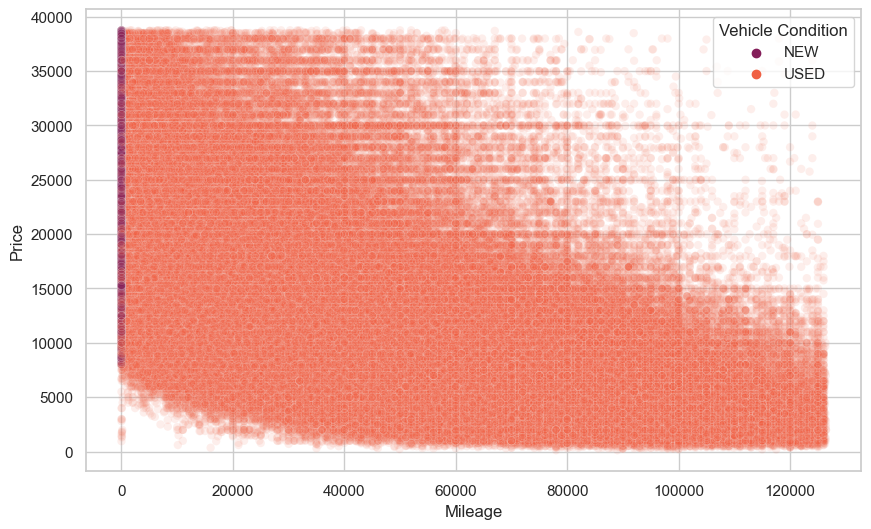

In [44]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='mileage', y='price', hue='vehicle_condition', data=processed_df, palette='rocket', alpha=0.1)
plt.xlabel('Mileage')
plt.ylabel('Price')
scatter_plot.legend(title='Vehicle Condition', loc='upper right')
plt.show()

Converting vehicle condition to boolean as it only has 2 unique values

In [45]:

processed_df_mapped = processed_df.copy()
processed_df_mapped['vehicle_condition'] = processed_df['vehicle_condition'].map({'USED': True, 'NEW': False})

processed_categorical_columns = df.select_dtypes(include=['object','bool']).columns
processed_df_mapped['vehicle_condition'].unique()
processed_categorical_columns


Index(['standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type'],
      dtype='object')

Encoding categorical feeatures in relation to target values using CatBoostEncoder 

In [46]:
from category_encoders.cat_boost import CatBoostEncoder
target = 'price'

CBE_encoder = CatBoostEncoder()
temp_df = CBE_encoder.fit_transform(processed_df_mapped[processed_categorical_columns], processed_df_mapped[target])
encoded_df = pd.concat([processed_df_mapped[numeric_columns], temp_df], axis=1)
encoded_df[['vehicle_condition','crossover_car_and_van']] = processed_df_mapped[['vehicle_condition','crossover_car_and_van']].astype(int)

encoded_df

,public_reference,mileage,year_of_registration,price,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN
1,202007020778260,108230.0,2011.0,7000.0,13463.729911,13463.729911,13463.729911,1,13463.729911,0,13463.729911
2,202007020778474,7800.0,2017.0,14000.0,6731.864956,13463.729911,13463.729911,1,6731.864956,0,13463.729911
3,202007080986776,45000.0,2016.0,7995.0,13463.729911,13463.729911,13463.729911,1,13463.729911,0,10231.864956
4,202007161321269,64000.0,2015.0,26995.0,9154.576637,13463.729911,13463.729911,1,9154.576637,0,9486.243304
...,...,...,...,...,...,...,...,...,...,...,...
402000,202010315652942,5179.0,2019.0,10595.0,13872.640256,9844.065813,9326.101168,1,10168.263116,0,11444.888924
402001,202010315657341,110000.0,2009.0,2000.0,11283.793821,9844.115344,2725.061906,1,10168.265667,0,11444.885006
402002,202010315659271,52760.0,2012.0,7250.0,13618.918930,11157.956150,12786.670538,1,15549.184503,0,11444.841467
402003,202011015662436,10250.0,2015.0,11490.0,11283.572904,15465.583459,16113.750890,1,10168.216847,0,11444.822129


Re-doing spearman's as we have both binary columns now

In [47]:
spearman_columns = ['mileage','year_of_registration','price','vehicle_condition','crossover_car_and_van']
encoded_df[spearman_columns].corr(method='spearman')

,mileage,year_of_registration,price,vehicle_condition,crossover_car_and_van
mileage,1.000000,-0.818206,-0.603281,0.464206,0.009825
year_of_registration,-0.818206,1.000000,0.681674,NaN,-0.000613
price,-0.603281,0.681674,1.000000,-0.281027,0.037262
vehicle_condition,0.464206,NaN,-0.281027,1.000000,0.007459
crossover_car_and_van,0.009825,-0.000613,0.037262,0.007459,1.000000


In [48]:
encoded_df.dtypes
# ALL VALUES ARE NOW FLOAT. WE CAN NOW IMPUTE ALL MISSING VALUES FROM COLUMNS 

public_reference           int64
mileage                  float64
year_of_registration     float64
price                    float64
standard_colour          float64
standard_make            float64
standard_model           float64
vehicle_condition          int32
body_type                float64
crossover_car_and_van      int32
fuel_type                float64
dtype: object

In [49]:
encoded_missing_columns=[]
for column in encoded_df.columns:
    if encoded_df[column].isnull().sum() > 0:
        encoded_missing_columns.append(column)


for column in encoded_missing_columns:
    print(column, (encoded_df[column].isnull().sum()/encoded_df.shape[0])*100)
# AS CAN BE SEEN BELOW, SOMEHOW THE NUMBER OF MISSING VALUES INCREASED AFTER ENCODING 

mileage 2.0666409621770874
year_of_registration 11.250108829492172
price 6.534495839603985
standard_colour 6.534495839603985
standard_make 6.534495839603985
standard_model 6.534495839603985
body_type 6.534495839603985
fuel_type 6.534495839603985


In [50]:
# WE WILL IMPUTE YEAR DIFFERENTLY, SO IT'S EXCLUDED FROM MISSING LIST
encoded_missing_columns.remove('year_of_registration')

Null Imputation using Iterative Imputer

In [51]:
from fancyimpute import IterativeImputer

# multivariate imputation algorithm that works iteratively to estimate missing values in a dataset
imputed_df = encoded_df.copy()
mice_imputer = IterativeImputer(max_iter=10, random_state=10)
imputed_df[encoded_missing_columns] = mice_imputer.fit_transform(encoded_df[encoded_missing_columns])

# per iteration, imputer replaces missing values with predictions based on current state of imputed dataset
# until convergence

# special adjustment for time series year missing values
imputed_df['year_of_registration'] = encoded_df['year_of_registration'].interpolate(method='linear', limit_direction='both')

imputed_df.isnull().sum()

public_reference         0
mileage                  0
year_of_registration     0
price                    0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [52]:
imputed_df[['mileage','price']].describe()

,mileage,price
count,402005.000000,402005.000000
mean,36110.582038,13739.701178
std,30930.055591,8143.280016
min,-38794.566089,120.000000
25%,10480.000000,7495.000000
50%,28611.000000,12500.000000
75%,56091.000000,18800.000000
max,126451.000000,38755.000000


Re-doing pointbiserial as no nans anymore to give errors

In [53]:
print(pointbiserialr(imputed_df['crossover_car_and_van'], imputed_df['price']),'\n',
pointbiserialr(imputed_df['vehicle_condition'], imputed_df['price']))

SignificanceResult(statistic=0.038147278894718924, pvalue=2.4763148460048923e-129) 
 SignificanceResult(statistic=-0.30276517973538514, pvalue=0.0)


Checking skewness and kurtosis of mileage and price after outlier removal and null imputation

In [54]:
skewness = skew(imputed_df['price'])
kurt = kurtosis(imputed_df['price'])

skewness,kurt

(0.7074544713433069, 0.08617113630856643)

In [55]:
skewness = skew(imputed_df['mileage'])
kurt = kurtosis(imputed_df['mileage'])

skewness,kurt

(0.8027258190981962, -0.2271749989052192)

In [56]:
imputed_df

,public_reference,mileage,year_of_registration,price,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,2011.0,19153.496354,12769.612315,12374.234912,13725.705487,0,12547.112691,0,12426.945179
1,202007020778260,108230.0,2011.0,7000.000000,13463.729911,13463.729911,13463.729911,1,13463.729911,0,13463.729911
2,202007020778474,7800.0,2017.0,14000.000000,6731.864956,13463.729911,13463.729911,1,6731.864956,0,13463.729911
3,202007080986776,45000.0,2016.0,7995.000000,13463.729911,13463.729911,13463.729911,1,13463.729911,0,10231.864956
4,202007161321269,64000.0,2015.0,26995.000000,9154.576637,13463.729911,13463.729911,1,9154.576637,0,9486.243304
...,...,...,...,...,...,...,...,...,...,...,...
402000,202010315652942,5179.0,2019.0,10595.000000,13872.640256,9844.065813,9326.101168,1,10168.263116,0,11444.888924
402001,202010315657341,110000.0,2009.0,2000.000000,11283.793821,9844.115344,2725.061906,1,10168.265667,0,11444.885006
402002,202010315659271,52760.0,2012.0,7250.000000,13618.918930,11157.956150,12786.670538,1,15549.184503,0,11444.841467
402003,202011015662436,10250.0,2015.0,11490.000000,11283.572904,15465.583459,16113.750890,1,10168.216847,0,11444.822129


Feature Engineering | Creating 'age of vehicle' through year of registration 

In [57]:
imputed_df['year_of_registration'].max()

2020.0

In [58]:

#GOING TO ASSUME 2020 IS CURRENT YEAR AS THAT'S THE LATEST
# # mileage per year
# imputed_df['mileage_per_year'] = imputed_df['mileage'] / (2020 - imputed_df['year_of_registration'])

# age of Vehicle
imputed_df['age_of_vehicle'] = 2020 - imputed_df['year_of_registration']


In [59]:
imputed_df.drop(['year_of_registration'],axis=1,inplace=True)

Scaling using RobustScaler

In [60]:
from sklearn.preprocessing import RobustScaler
columns_to_scale = ['mileage','price','standard_colour','standard_make','standard_model','body_type','fuel_type']
scaled_df = imputed_df.copy()
scaled_df[columns_to_scale] = RobustScaler().fit_transform(scaled_df[columns_to_scale])
scaled_df

,public_reference,mileage,price,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type,age_of_vehicle
0,202006039777689,-0.627283,0.588545,-0.092200,-0.040950,0.108994,0,0.030455,0,0.411730,9.0
1,202007020778260,1.745610,-0.486510,0.254133,0.233006,0.069137,1,0.200729,0,0.929038,9.0
2,202007020778474,-0.456272,0.132685,-3.104764,0.233006,0.069137,1,-1.049805,0,0.929038,3.0
3,202007080986776,0.359321,-0.398496,0.254133,0.233006,0.069137,1,0.200729,0,-0.683515,4.0
4,202007161321269,0.775887,1.282176,-1.895940,0.233006,0.069137,1,-0.599754,0,-1.055546,5.0
...,...,...,...,...,...,...,...,...,...,...,...
402000,202010315652942,-0.513736,-0.168510,0.458161,-0.677168,-0.560347,1,-0.411448,0,-0.078272,1.0
402001,202010315657341,1.784416,-0.928793,-0.833556,-0.677155,-1.564607,1,-0.411448,0,-0.078274,11.0
402002,202010315659271,0.529456,-0.464396,0.331566,-0.346787,-0.033868,1,0.588130,0,-0.078295,8.0
402003,202011015662436,-0.402556,-0.089341,-0.833667,0.736377,0.472303,1,-0.411457,0,-0.078305,5.0


In [61]:
scaled_df.describe()

,public_reference,mileage,price,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type,age_of_vehicle
count,4.020050e+05,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000
mean,2.020071e+14,0.164425,0.109660,-0.177317,0.006753,-0.034038,0.922267,0.019718,0.004465,0.482892,4.477171
std,1.691662e+10,0.678127,0.720326,0.606621,0.660499,0.706379,0.267751,0.434388,0.066672,0.710134,3.309829
min,2.013072e+14,-1.477836,-1.095091,-4.060852,-3.142033,-1.915179,0.000000,-1.343713,0.000000,-2.429856,0.000000
25%,2.020090e+14,-0.397514,-0.442724,-0.648715,-0.420289,-0.603761,1.000000,-0.411531,0.000000,-0.074759,2.000000
50%,2.020093e+14,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
75%,2.020102e+14,0.602486,0.557276,0.351285,0.579711,0.396239,1.000000,0.588469,0.000000,0.925241,6.000000
max,2.020110e+14,2.145097,2.322424,5.846487,4.040444,3.430922,1.000000,2.394121,1.000000,4.930598,14.000000


In [62]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                402005 non-null  float64
 2   price                  402005 non-null  float64
 3   standard_colour        402005 non-null  float64
 4   standard_make          402005 non-null  float64
 5   standard_model         402005 non-null  float64
 6   vehicle_condition      402005 non-null  int32  
 7   body_type              402005 non-null  float64
 8   crossover_car_and_van  402005 non-null  int32  
 9   fuel_type              402005 non-null  float64
 10  age_of_vehicle         402005 non-null  float64
dtypes: float64(8), int32(2), int64(1)
memory usage: 30.7 MB


Data subsetting for predictor and target columns with X and y respectively, to use in cross-fold validation

In [63]:
from sklearn.model_selection import cross_val_predict, KFold
from xgboost import XGBRegressor


X = scaled_df.drop('price', axis=1)
y = scaled_df['price']


Feature selection using SelectKBest selector with f_regression as the score function | Reshaping X

In [64]:
from sklearn.feature_selection import SelectKBest, f_regression

X = scaled_df.drop('price', axis=1)
y = scaled_df['price']

selector = SelectKBest(score_func=f_regression, k=8)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

# GOT ALL OF THE SCORES FROM SELECTKBEST AND THE RESPECTIVE COLUMNS. 
#ZIPPED THEN SORTED BY HIGHEST VALUE
feature_scores = sorted(zip(X.columns, selector.scores_), 
                        key=lambda x: x[1], reverse=True)
for name, score in feature_scores:
    print(f"{name}: {score}")
print("Selected Features:")
print(selected_features)

# GOT ONLY FEATURES SELECTED
X_selected_df = X[selected_features]
# AS CAN BE SEEN EBLOW, THE FEATURES WITH THE HIGHER SCORES FOR THE FEATURE SELECTD 
# ARE  MODEL, MILEAGE, AGE, MANUFACTURER (MAKE), BODY TYPE, ETC
# CROSSOVER CAR AND VAN APPARENTLY HAS VERY LITTLE MODEL PREDICTABILITY RELATIVE 
#TO THE REST. SAME WITH PUBLIC REFERENCE


# PUBLIC REFERENCE AND CROSSOVER_CAR_AND_VAN ARE EXCLUDED 

standard_model: 245652.71049412026
mileage: 196541.43296779785
age_of_vehicle: 166006.863282178
standard_make: 69806.88034001026
body_type: 68154.83707236468
vehicle_condition: 40569.152672935445
fuel_type: 19981.741801945045
standard_colour: 12530.600134046212
public_reference: 1228.0504188856323
crossover_car_and_van: 585.8532926793797
Selected Features:
Index(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'fuel_type', 'age_of_vehicle'],
      dtype='object')


In [65]:
print(X.shape, X_selected_df.shape)
# TWO COLUMNS EXCLUDED

(402005, 10) (402005, 8)


In [66]:
total = 0
for name, score in feature_scores:
    total += score
# EXTRACTING TOTAL HERE. GETTING MEAN
print((total/10)/585.8532926793797)
print((total/10)/1086.0311264384636)

# AS CAN BE SEEN, THE AVERAGE HAD APPROX 100-150 TIMES THE SCORING OF THE CROSSOVER_CAR_AND_VAN AND PUBLIC REF, THEREBY BOTH EXCLUDED

140.1473940211007
75.60171181921324


# Model Building

Model building, using cross-fold validation, and coarse-grained evaluation

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score


def regression_metrics(y_true, y_pred):
    mae, mse, = mean_absolute_error(y_true, y_pred), mean_squared_error(y_true, y_pred)
    r2, explained_var = r2_score(y_true, y_pred), explained_variance_score(y_true, y_pred)
    return mae, mse, r2, explained_var

models = [
    ("Weighted KNN", KNeighborsRegressor(n_neighbors=3, weights='uniform')),
    ("XGBoost", XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)),
    ("Bayesian LR", BayesianRidge(alpha_1=1e-04, alpha_2= 0.1e-6))
]

In [68]:
# COARSE GRAINED EVALUATION
print("Coarse-Grained Evaluation")
all_predictions = []
feature_importance_xgb = None
for model_name, model in models:
    predictions = cross_val_predict(model, X_selected_df, y, 
        cv=KFold(n_splits=10, shuffle=True, random_state=10))
    mae, mse, r2, explained_var = regression_metrics(y, predictions)
    all_predictions.append((model_name,predictions))
    print(f"{model_name} Metrics: \nMAE: {mae:.4f}")
    print(f"MSE: {mse:.4f} \nR2: {r2:.4f}")
    print(f"Explained Variance: {explained_var:.4f}")

Coarse-Grained Evaluation


In [ ]:
"""BEFORE EXCLUDING CROSSOVER_CAR_AND_VAN AND PUBLIC REF:
Coarse-Grained Evaluation
Weighted KNN Metrics: 
MAE: 0.5631 
MSE: 0.5405 
R2: -0.0082 
Explained Variance: -0.0077
XGBoost Metrics: 
MAE: 0.2247 
MSE: 0.1199 
R2: 0.7764 
Explained Variance: 0.7764
Bayesian LR Metrics: 
MAE: 0.2931 
MSE: 0.1758 
R2: 0.6720 
Explained Variance: 0.6720

AFTER EXCLUDING:
Coarse-Grained Evaluation
Weighted KNN Metrics: 
MAE: 0.1729 
MSE: 0.0865 
R2: 0.8386 
Explained Variance: 0.8386
XGBoost Metrics: 
MAE: 0.2244 
MSE: 0.1198 
R2: 0.7766 
Explained Variance: 0.7766
Bayesian LR Metrics: 
MAE: 0.2933 
MSE: 0.1762 
R2: 0.6714 
Explained Variance: 0.6714
"""

# AS THE PERFORMANCE VALUES INDICATE, THERE'S VERY LITTLE DIFFERENCE IF ANY, IN PERFORMANCES OF XGB AND BLR AFTER EXLUCLIDNG THE COLUMNS.
# WEIGHTER KNN, HOWEVER, SHOWED DRASTIC IMPROVEMENTS 
# 'BEFORE' CAN BE REPLICATED BY PASSING IN X INSTEAD OF X_selected_df IN cross_val_predict()


'BEFORE EXCLUDING CROSSOVER_CAR_AND_VAN AND PUBLIC REF:\nCoarse-Grained Evaluation\nWeighted KNN Metrics: \nMAE: 0.5631 \nMSE: 0.5405 \nR2: -0.0082 \nExplained Variance: -0.0077\nXGBoost Metrics: \nMAE: 0.2247 \nMSE: 0.1199 \nR2: 0.7764 \nExplained Variance: 0.7764\nBayesian LR Metrics: \nMAE: 0.2931 \nMSE: 0.1758 \nR2: 0.6720 \nExplained Variance: 0.6720\n\nAFTER EXCLUDING:\nCoarse-Grained Evaluation\nWeighted KNN Metrics: \nMAE: 0.1729 \nMSE: 0.0865 \nR2: 0.8386 \nExplained Variance: 0.8386\nXGBoost Metrics: \nMAE: 0.2244 \nMSE: 0.1198 \nR2: 0.7766 \nExplained Variance: 0.7766\nBayesian LR Metrics: \nMAE: 0.2933 \nMSE: 0.1762 \nR2: 0.6714 \nExplained Variance: 0.6714\n'

Using fine-grained evaluation

In [ ]:
instance_errors = pd.DataFrame({'Actual': y, all_predictions[0][0]: all_predictions[0][1], all_predictions[1][0]: all_predictions[0][1], all_predictions[2][0]: all_predictions[0][1]})
# all_predictions[0] here refers to first tuple of knn, then [1] for xgb, then [2] for bayesian ridge. for each tuple [0] represents name and [1] represents model predictions!
# FINE GRAINED EVALUATION
print("Instance-Level Errors")
instance_errors.head(10)


Instance-Level Errors


,Actual,Weighted KNN,XGBoost,Bayesian LR
0,0.588545,0.588545,0.588545,0.588545
1,-0.486510,-0.555713,-0.555713,-0.555713
2,0.132685,0.100840,0.100840,0.100840
3,-0.398496,0.440513,0.440513,0.440513
4,1.282176,-0.015303,-0.015303,-0.015303
5,1.459531,0.349963,0.349963,0.349963
6,-0.587262,0.002506,0.002506,0.002506
7,1.059266,-0.241987,-0.241987,-0.241987
8,-0.486953,-0.720065,-0.720065,-0.720065
9,0.462559,0.462559,0.462559,0.462559


In [ ]:
# FINE GRAINED EVALUATION
print("Instance-Level Errors")
instance_errors = pd.DataFrame({'Actual': y})
for model_name, predictions in all_predictions:
    instance_errors[model_name] = predictions

instance_errors['Error_KNN'] = instance_errors['Actual'] - instance_errors['Weighted KNN']
instance_errors['Error_XGBoost'] = instance_errors['Actual'] - instance_errors['XGBoost']
instance_errors['Error_Bayesian_LR'] = instance_errors['Actual'] - instance_errors['Bayesian LR']

instance_errors.head(10)


Instance-Level Errors


,Actual,Weighted KNN,XGBoost,Bayesian LR,Error_KNN,Error_XGBoost,Error_Bayesian_LR
0,0.588545,0.588545,0.632905,0.801858,0.000000,-0.044360,-0.213313
1,-0.486510,-0.555713,-0.581325,-0.551010,0.069202,0.094814,0.064499
2,0.132685,0.100840,0.405602,0.135364,0.031844,-0.272917,-0.002679
3,-0.398496,0.440513,0.155164,0.019412,-0.839009,-0.553661,-0.417908
4,1.282176,-0.015303,-0.203676,-0.523724,1.297479,1.485852,1.805900
5,1.459531,0.349963,0.397941,0.440246,1.109568,1.061590,1.019285
6,-0.587262,0.002506,0.334779,0.407454,-0.589769,-0.922041,-0.994717
7,1.059266,-0.241987,-0.169187,-0.063658,1.301253,1.228453,1.122924
8,-0.486953,-0.720065,-0.668830,-0.475277,0.233112,0.181878,-0.011676
9,0.462559,0.462559,0.508601,0.425118,0.000000,-0.046043,0.037441


Analysing Feature Importances

In [ ]:
xgb=models[1][1]
xgb.fit(X, y)
feature_importance_xgb = xgb.feature_importances_

print("Feature Importance (XGBoost):")
for feature, importance in sorted(zip(X.columns, feature_importance_xgb), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")
# INCLUDING ALL COLUMNS HERE.
# THE IMPORTANCE RANKING HERE CORROBORATES WITH THE FEATURE SELECTOR'S RANKING DEMONSTRATED EARLIER

Feature Importance (XGBoost):
mileage: 0.3733
standard_model: 0.2983
age_of_vehicle: 0.1295
standard_make: 0.0676
body_type: 0.0491
fuel_type: 0.0362
vehicle_condition: 0.0254
standard_colour: 0.0095
crossover_car_and_van: 0.0075
public_reference: 0.0035


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(xgb, X, y, n_repeats=10, random_state=13)
importance_perm = result.importances_mean
sorted_indices = np.argsort(importance_perm)[::-1]

print("Permutation Importance Ranking:")
for i, index in enumerate(sorted_indices):
    print(f"{i+1} {X.columns[index]}: {importance_perm[index]:.4f}")


Permutation Importance Ranking:
1 mileage: 0.3828
2 standard_model: 0.1956
3 age_of_vehicle: 0.1747
4 standard_make: 0.1362
5 body_type: 0.0788
6 fuel_type: 0.0237
7 vehicle_condition: 0.0161
8 crossover_car_and_van: 0.0014
9 standard_colour: 0.0013
10 public_reference: 0.0003


In [ ]:
print(models)

[('Weighted KNN', KNeighborsRegressor(n_neighbors=3)), ('XGBoost', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)), ('Bayesian LR', BayesianRidge(alpha_1=0.0001, alpha_2=1e-07))]


# Hyperparameter Tuning

Set 'tuning' to True if wanting to replicate. Takes 9 minutes so set to False for convenience. Results recording in comments below

In [ ]:
tuning = False

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# PARAM RANGES DEFINED HERE
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
bayesian_ridge_param_grid = {'alpha_1': [1e-6, 1e-5, 1e-4], 'alpha_2': [1e-6, 1e-5, 1e-4]}
xgb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

models = [
    ("Weighted KNN", KNeighborsRegressor(), knn_param_grid),
    ("Bayesian LR", BayesianRidge(), bayesian_ridge_param_grid),
    ("XGBoost", XGBRegressor(), xgb_param_grid)
]

knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
bayesian_ridge_param_grid = {'alpha_1': [1e-6, 1e-5, 1e-4], 'alpha_2': [1e-6, 1e-5, 1e-4]}
xgb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

scoring_function = make_scorer(mean_absolute_error, greater_is_better=False)
if tuning:
    for model_name, model, param_grid in models:
        grid_search = GridSearchCV(model, param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=12), 
                                   scoring=scoring_function, n_jobs=-1)
        grid_search.fit(X_selected_df, y)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        predictions = cross_val_predict(best_model, X_selected_df, y,
                                         cv=KFold(n_splits=10, shuffle=True, random_state=12))
        mae, mse, r2, explained_var = regression_metrics(y, predictions)
        print(f"\n{model_name} Grid Search Results:")
        print(f"Best Parameters: {best_params}")
        print(f"{model_name} Metrics on Full Dataset:")
        print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}, Explained Variance: {explained_var:.4f}")

In [ ]:
# MSE OF KNN ONLY SLIGHTLY IMPROVED. R2 AND VARIANCE SIMILAR STORY
# ONLY XGBOOST HAD SIGNIFICANTLY IMPROVED PERFORMANCE PROCEEDING TUNING. MUCH BETTER MAE, MSE, R2. VARIANCE SLIGHTLY DECREASED
# BAYESIAN LR NO SIGNIFICANT IMPROVEMENT
""" 
Weighted KNN Grid Search Results:
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}

Bayesian LR Grid Search Results:
Best Parameters: {'alpha_1': 1e-06, 'alpha_2': 0.0001}

XGBoost Grid Search Results:
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
"""

" \nWeighted KNN Grid Search Results:\nBest Parameters: {'n_neighbors': 7, 'weights': 'distance'}\n\nBayesian LR Grid Search Results:\nBest Parameters: {'alpha_1': 1e-06, 'alpha_2': 0.0001}\n\nXGBoost Grid Search Results:\nBest Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}\n"

# Final Model Evaluation, Analysis, and Visualization

In [ ]:
def regression_metrics(y_true, y_pred):
    mae, mse, r2, explained_var = mean_absolute_error(y_true, y_pred), mean_squared_error(y_true, y_pred), r2_score(y_true, y_pred), explained_variance_score(y_true, y_pred)
    return mae, mse, r2, explained_var

def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=y_true, y=y_pred, scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'red'})
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.show()

def plot_residuals_distribution(residuals, model_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f"{model_name} - Residuals Distribution")
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.show()

tuned_models = [
    ("Weighted KNN", KNeighborsRegressor(n_neighbors=7, weights='distance')),
    ("XGBoost", XGBRegressor(n_estimators=200, learning_rate=0.2, max_depth=7)),
    ("Bayesian LR", BayesianRidge(alpha_1=1e-06, alpha_2= 0.0001))
]

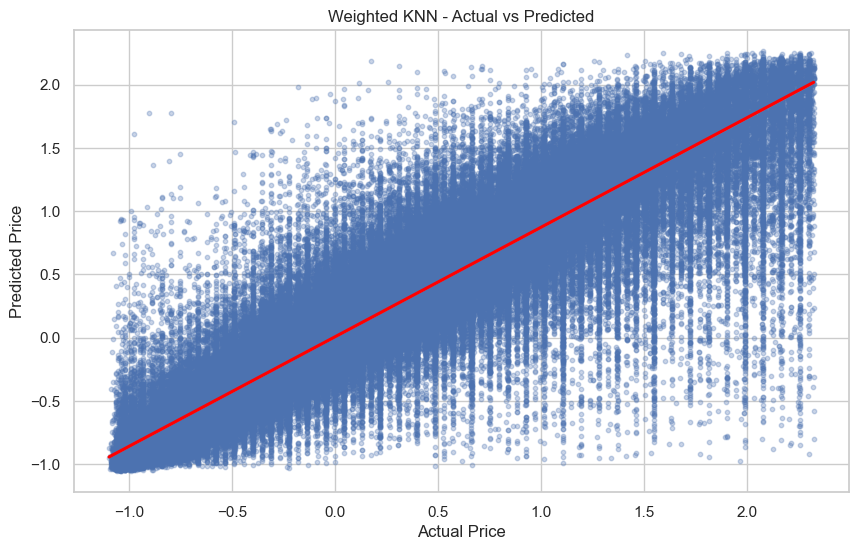

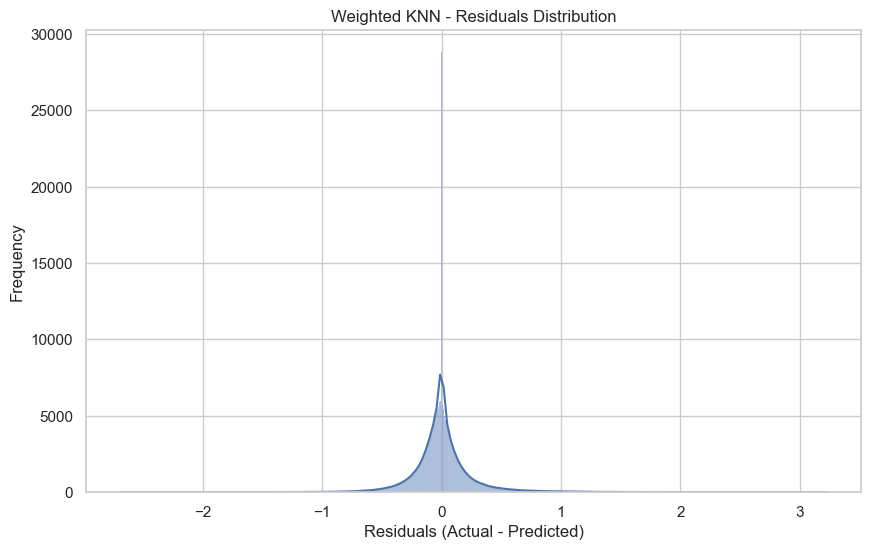

Weighted KNN Metrics: 
MAE: 0.1597 
MSE: 0.0728 
R2: 0.8598 
Explained Variance: 0.8599


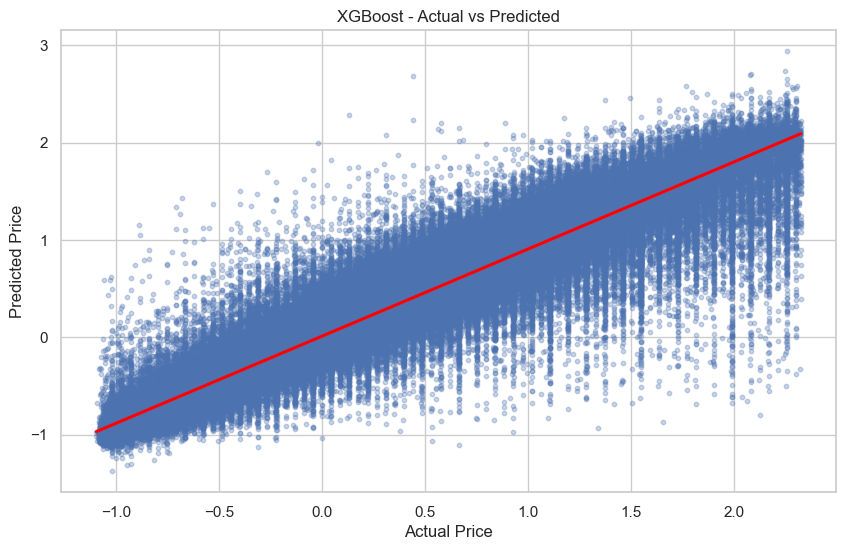

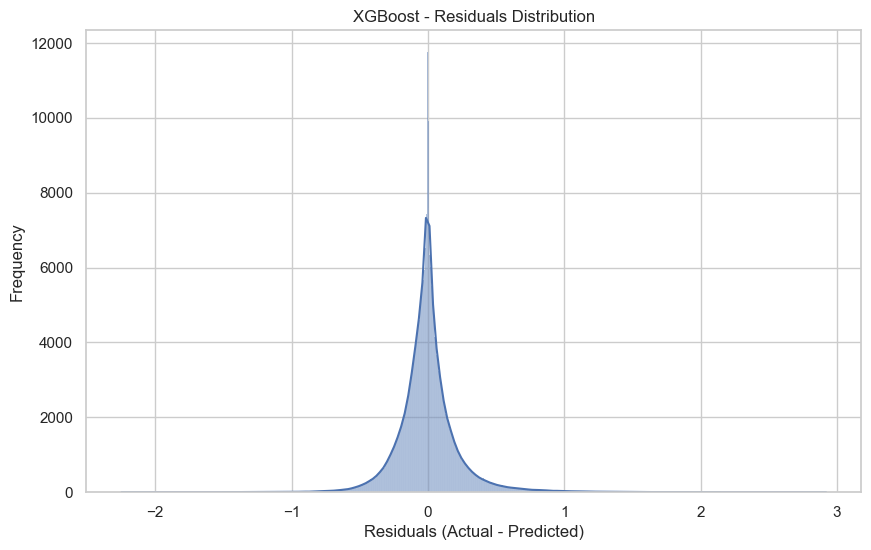

XGBoost Metrics: 
MAE: 0.1425 
MSE: 0.0506 
R2: 0.9024 
Explained Variance: 0.9024


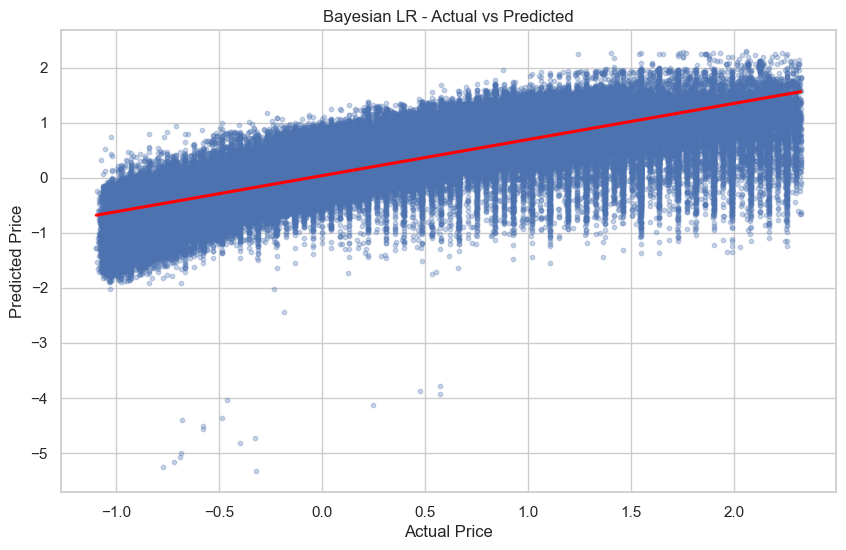

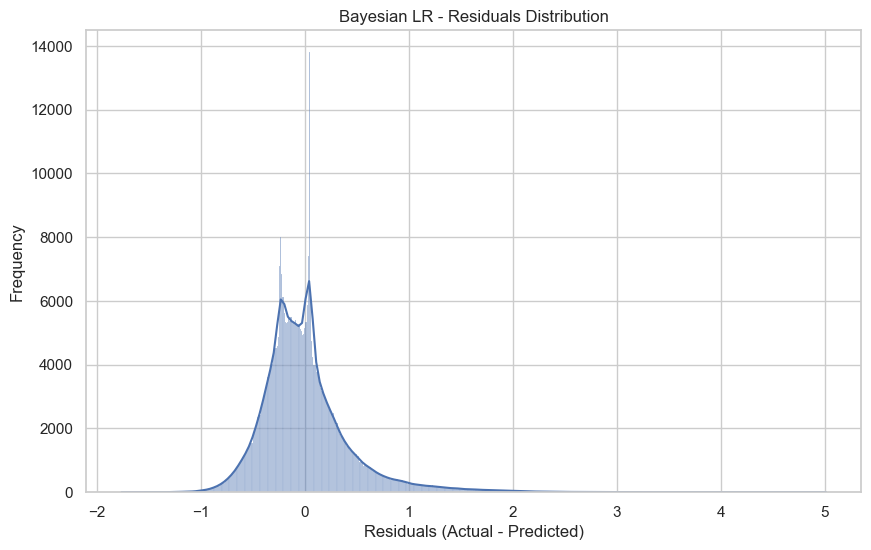

Bayesian LR Metrics: 
MAE: 0.2972 
MSE: 0.1782 
R2: 0.6565 
Explained Variance: 0.6565


In [ ]:


all_predictions = []

for model_name, model in tuned_models:
    predictions = cross_val_predict(model, X_selected_df, y, cv=KFold(n_splits=10, shuffle=True, random_state=40))
    mae, mse, r2, explained_var = regression_metrics(y, predictions)
    all_predictions.append((model_name, predictions))
    
    # ACTUAL AND PREDICTD BEING PLOTTED. INCLUDING LINE OF BEST FIT AS IT'S RELEVANT TO PERFORMANCE METRICS CALCULATIONS
    plot_actual_vs_predicted(y, predictions, model_name)
    
    # PLOTTING DISTRIBUTIONS OF RISIDUALS
    residuals = y - predictions
    plot_residuals_distribution(residuals, model_name)
    
    print(f"{model_name} Metrics: \nMAE: {mae:.4f} \nMSE: {mse:.4f} \nR2: {r2:.4f} \nExplained Variance: {explained_var:.4f}")
